# Amazon, modelo no supervisado

## Importar

In [1]:
# %load basic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
liga = '/Users/efraflores/Desktop/EF/diplo/AZ/data/'
os.listdir(liga)

['sentim.csv', 'df.csv']

In [2]:
import time
start = time.time()

In [3]:
df = pd.read_csv(liga + 'df.csv').join(pd.read_csv(liga + 'sentim.csv'))
backup = df.copy()
df.sample(4)

/Users/efraflores/Desktop/corner/corner/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,category,Anio,Mes,Sem,DiaSem,reviewText_limpio,reviewText_long,reviewText_n_words,reviewText_relevant,neg,neu,pos,compound
689264,5.00,True,2014-12-29,A151DP6LWWI8LC,B009972D5U,Aleksandr,great Five Stars,Five Stars,0 days,NaN,Sí,NaN,cell_phones_and_accessories,2014,dic,1,lun,great five star,16.00,3.00,0.94,0.00,0.33,0.67,0.62
315528,5.00,True,2015-05-18,A1W49O3LYZ8GI5,B007EZM98U,Marilyn Burrows,Two sets of orphaned children. One set were ta...,He came to America to build a mansion for his ...,0 days,NaN,No_especifica,NaN,kindle_store,2015,may,21,lun,two set orphaned child one set taken relative ...,330.00,63.00,0.59,0.23,0.57,0.21,-0.20
336924,1.00,True,2013-03-24,A14LE8RUXR8OAF,B0085L1GD6,Sarah Mendez,I don't what to say um I kinda expected more o...,Real Lies (the shortest book of all time),0 days,2.0,No_especifica,NaN,kindle_store,2013,mar,12,dom,say um kinda expected book understand like fou...,204.00,41.00,0.55,0.00,0.88,0.12,0.36
77800,3.00,False,2006-12-18,A3HHJQ7ZZ084I9,B000E0XX9Q,C. R. Nelson,I just received this game from myself as an ea...,I Think I Can I Think I Can I Think I...Can't?,0 days,5,No_especifica,NaN,video_games,2006,dic,51,lun,received game early christmas present hardly k...,2400.00,440.00,0.57,0.12,0.61,0.27,0.99


## Funciones

In [4]:
import time
import math

start = time.time()

def time_exp(x):
    print(str(int(math.floor(x/60))
             ) + " minutos con " + '{:.2f}'.format(60*(x/60 - math.floor(x/60))
                                                  ) + " segundos")

In [5]:
#Tono para cuando termina el script
from IPython.lib.display import Audio
import numpy as np

def tono(a = 1000, b = 700, play_time_seconds = 1, framerate = 4410,):
    t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)*np.pi
    return Audio(np.sin(a*t) + np.sin(b*t), rate = framerate, autoplay=True)

In [6]:
def outlier(df, x , p = 0.5):
    var = df[x]
    q1 = var.quantile(p/2)
    q3 = var.quantile(1 - p/2)
    iqr = q3 - q1
    df = df[(var.isnull()) | ((var >= q1 - 1.5*iqr) & (var <= q3 + 1.5*iqr))].copy()
    return df

In [7]:
def perc25(x):
    return np.percentile(x, 25)
def perc50(x):
    return np.percentile(x, 50) 
def perc75(x):
    return np.percentile(x, 75)

def funciones_varias(var_list, funciones = ['mean', perc25, perc50, perc75], contar = True):
    dict_func = {}
    for i,var in enumerate(var_list):
        aux = ['count'] if i==0 and contar else []
        dict_func[var] = aux + funciones
    return dict_func

## TAD

In [8]:
#Trimestre
df['quarter'] = pd.to_datetime(df['reviewTime']).dt.quarter.astype(str)
df['quarter'].value_counts(1)

1   0.28
4   0.25
3   0.24
2   0.22
Name: quarter, dtype: float64

In [9]:
#Longitud promedio por palabra
df['long_p_word'] = (df['reviewText_long'] + 1) / (df['reviewText_n_words'] + 1)
df['long_p_word'].describe([.05,.95])

count   719705.00
mean         5.24
std          0.60
min          1.33
5%           4.25
50%          5.26
95%          6.07
max         59.50
Name: long_p_word, dtype: float64

In [10]:
#Omitir outliers
dim_antes = len(df)
df = outlier(df,'long_p_word').reset_index(drop = True)
print(len(df) / dim_antes)
df['long_p_word'].describe([.05,.95])

0.9702160223772184


count   698260.00
mean         5.23
std          0.48
min          3.95
5%           4.36
50%          5.26
95%          6.00
max          6.53
Name: long_p_word, dtype: float64

In [11]:
#Vida del producto, año máximo de venta menos año de comentario
df = df.merge(df.pivot_table(index = 'asin',
                             values = 'Anio',
                             aggfunc = 'max').rename(columns = {'Anio':'Vida'}).reset_index(), 
              on = 'asin', 
              how = 'left')

df['Vida'] -= df['Anio']

In [12]:
#Sólo mantener el año de vida 0 y 1
df = df[df['Vida'].isin([0,1])]
df['Vida'].value_counts(1)

1   0.57
0   0.43
Name: Vida, dtype: float64

In [13]:
#Cambio de estructura
variables = ['overall','reviewText_n_words','reviewText_relevant',
             'neg', 'neu', 'pos', 'compound','long_p_word']

df[variables] = df[variables].astype(float)

df = df.pivot_table(index = 'asin', 
                    columns = ['Vida'],
                    values = variables, 
                    aggfunc = funciones_varias(variables), 
                    fill_value = 0)

df.columns = [str(vida)+"_"+var+"_"+func for var,func,vida in df.columns]
df = df[sorted(df.columns)].copy()

df.sample(4)

,0_compound_mean,0_compound_perc25,0_compound_perc50,0_compound_perc75,0_long_p_word_mean,0_long_p_word_perc25,0_long_p_word_perc50,0_long_p_word_perc75,0_neg_mean,0_neg_perc25,0_neg_perc50,0_neg_perc75,0_neu_mean,0_neu_perc25,0_neu_perc50,0_neu_perc75,0_overall_count,0_overall_mean,0_overall_perc25,0_overall_perc50,0_overall_perc75,0_pos_mean,0_pos_perc25,0_pos_perc50,0_pos_perc75,0_reviewText_n_words_mean,0_reviewText_n_words_perc25,0_reviewText_n_words_perc50,0_reviewText_n_words_perc75,0_reviewText_relevant_mean,0_reviewText_relevant_perc25,0_reviewText_relevant_perc50,0_reviewText_relevant_perc75,1_compound_mean,1_compound_perc25,1_compound_perc50,1_compound_perc75,1_long_p_word_mean,1_long_p_word_perc25,1_long_p_word_perc50,1_long_p_word_perc75,1_neg_mean,1_neg_perc25,1_neg_perc50,1_neg_perc75,1_neu_mean,1_neu_perc25,1_neu_perc50,1_neu_perc75,1_overall_count,1_overall_mean,1_overall_perc25,1_overall_perc50,1_overall_perc75,1_pos_mean,1_pos_perc25,1_pos_perc50,1_pos_perc75,1_reviewText_n_words_mean,1_reviewText_n_words_perc25,1_reviewText_n_words_perc50,1_reviewText_n_words_perc75,1_reviewText_relevant_mean,1_reviewText_relevant_perc25,1_reviewText_relevant_perc50,1_reviewText_relevant_perc75
asin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B00005ME6E,0.56,0.36,0.56,0.77,4.96,4.69,4.96,5.24,0.16,0.15,0.16,0.18,0.52,0.50,0.52,0.54,2,5.00,5.00,5.00,5.00,0.32,0.27,0.32,0.36,75.50,52.75,75.50,98.25,0.54,0.51,0.54,0.56,0.73,0.63,0.85,0.95,5.60,5.44,5.68,5.85,0.10,0.07,0.11,0.14,0.65,0.58,0.64,0.70,4,4.25,3.75,4.50,5.00,0.25,0.22,0.28,0.31,102.50,71.50,84.00,115.00,0.66,0.61,0.69,0.73
6300151360,0.83,0.82,0.85,0.86,5.15,4.97,5.42,5.47,0.04,0.00,0.00,0.06,0.65,0.62,0.67,0.70,3,4.33,4.00,5.00,5.00,0.31,0.24,0.33,0.38,97.67,40.50,51.00,131.50,0.65,0.61,0.66,0.69,0.15,-0.19,0.15,0.49,5.03,4.98,5.03,5.08,0.15,0.11,0.15,0.20,0.66,0.63,0.66,0.68,2,3.50,3.25,3.50,3.75,0.19,0.17,0.19,0.21,92.00,84.50,92.00,99.50,0.58,0.56,0.58,0.61
B0065GKZEY,0.24,-0.02,0.72,0.74,4.88,4.65,4.66,5.01,0.17,0.05,0.11,0.26,0.59,0.57,0.59,0.62,3,3.33,2.50,4.00,4.50,0.23,0.12,0.24,0.35,44.00,21.00,29.00,59.50,0.62,0.55,0.59,0.67,0.73,0.61,0.80,0.92,4.96,4.84,4.99,5.24,0.04,0.01,0.06,0.07,0.65,0.52,0.68,0.79,8,4.50,4.00,5.00,5.00,0.30,0.15,0.25,0.42,74.00,45.00,55.50,78.50,0.56,0.52,0.57,0.59
B00979M0LW,0.24,0.00,0.44,0.51,4.87,4.40,5.16,5.33,0.09,0.00,0.00,0.00,0.61,0.39,0.51,0.81,7,4.00,3.50,5.00,5.00,0.30,0.00,0.39,0.54,8.71,3.00,5.00,11.50,0.77,0.61,0.77,0.92,0.54,0.44,0.62,0.63,4.84,4.56,4.73,5.00,0.00,0.00,0.00,0.00,0.53,0.35,0.50,0.59,10,4.70,5.00,5.00,5.00,0.47,0.41,0.50,0.65,9.90,3.00,5.00,9.00,0.84,0.74,0.89,0.94


## K-óptimo

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

sse,db,slc = {}, {}, {}
for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, max_iter= 100, random_state = 22).fit(df)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    db[k] = davies_bouldin_score(df, clusters)
    slc[k] = silhouette_score(df, clusters)

dicts = [sse,db,slc]

for dicc in dicts:
    min_value = min(list(dicc.values()))
    max_value = max(list(dicc.values()))
    for k in dicc.keys():
        dicc[k] = (dicc[k] - min_value + 1) / (max_value - min_value + 1)

ModuleNotFoundError: No module named 'cairosvg'

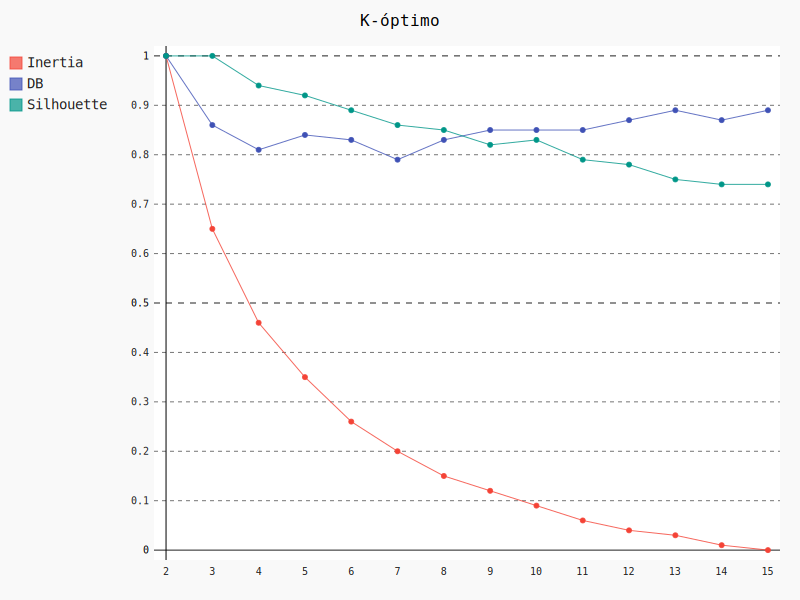

In [15]:
import pygal
line_chart = pygal.Line()
line_chart.title = 'K-óptimo'
line_chart.x_labels = map(str, sse.keys())
for name, dicc in zip(['Inertia','DB','Silhouette'],dicts):
    line_chart.add(name, list(map(lambda x: round(x,2), dicc.values())))
line_chart

In [16]:
line_chart.render_in_browser()

file:///var/folders/j4/1p33_bh96yn8pdz3b_5t80hm0000gn/T/tmpkavo0xfw.html


## Cluster

C   0.30
F   0.28
B   0.13
E   0.10
A   0.09
G   0.06
D   0.04
Name: df_cluster, dtype: float64

0.7886632896324912

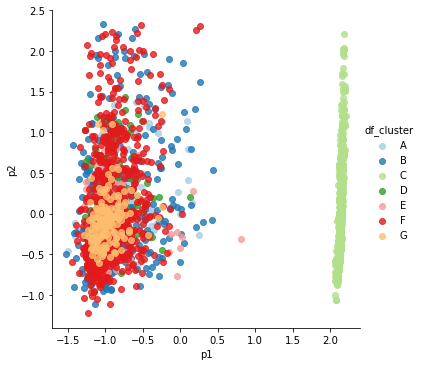

In [17]:
import string
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

mm_df = MinMaxScaler()

#Aplicar MinMax y PCA al mismo tiempo
Xs = pd.DataFrame(mm_df.fit_transform(df[[x for x in df.columns if not x.endswith('luster')]]), 
                  index = df.index,
                  columns = df.columns)

#Clusterizar
n_clusters = 7
cluster = GaussianMixture(n_components = n_clusters, random_state = 22)
df['df_cluster'] = Xs['df_cluster'] = cluster.fit_predict(Xs)

#Diccionario de letras mayúsculas
dict_cluster_df = dict(zip(range(n_clusters),string.ascii_uppercase[:n_clusters]))

#Reemplazar número de clúster por letra
Xs['df_cluster'] = Xs[['df_cluster']].replace(dict_cluster_df)
df['df_cluster'] = Xs['df_cluster'].copy()

#Porcentaje de registros por clúster
display(df['df_cluster'].value_counts(1))

#Ahora, con sólo dos componentes en PCA para poder apreciar gráficamente
pca_df = PCA(2)
pipe_df = Pipeline(steps=[('MinMax', mm_df),
                          ('PCA', pca_df)])
#Aplicar MinMax y PCA al mismo tiempo
Xg = pd.DataFrame(pipe_df.fit_transform(df[[x for x in df.columns if not x.endswith('luster')]]), 
                  index = df.index,
                  columns = ['p1','p2'])

#Varianza explicada
display(pca_df.explained_variance_ratio_.sum())

#Reemplazar número de clúster por letra
Xg['df_cluster'] = Xs['df_cluster'].copy()
#Scatterplot de las dos dimensiones de PCA separando por color cada clúster
sns.lmplot(data = Xg.sample(frac = .1).sort_values(by = 'df_cluster'),
           x = 'p1',
           y = 'p2',
           fit_reg = False, 
           hue = 'df_cluster', 
           palette = 'Paired')

## Perfilamiento

<AxesSubplot:xlabel='df_cluster'>

<Figure size 432x288 with 0 Axes>

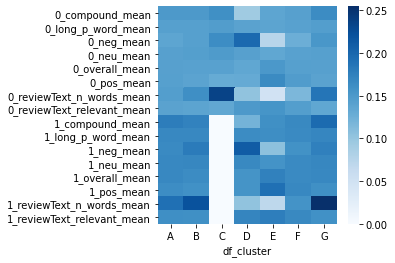

In [18]:
import seaborn as sns
#Perfilamiento
aux = df[[x for x in df.columns 
          if x.endswith('mean')] + ['df_cluster']].groupby('df_cluster').mean()
#Porcentaje respecto a la suma por columna
for col in aux.columns:
    aux[col] = aux[col]/aux[col].sum()

fig = plt.figure()
fig, ax = plt.subplots(figsize=(4,4)) 
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

#Heatmap
sns.heatmap(aux.transpose(), cmap = 'Blues')

<AxesSubplot:xlabel='df_cluster'>

<Figure size 432x288 with 0 Axes>

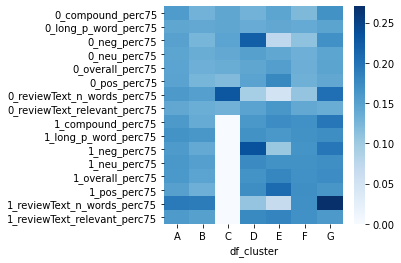

In [19]:
import seaborn as sns
#Perfilamiento
aux = df[[x for x in df.columns 
          if x.endswith('perc75')] + ['df_cluster']].groupby('df_cluster').mean()
#Porcentaje respecto a la suma por columna
for col in aux.columns:
    aux[col] = aux[col]/aux[col].sum()

fig = plt.figure()
fig, ax = plt.subplots(figsize=(4,4)) 
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

#Heatmap
sns.heatmap(aux.transpose(), cmap = 'Blues')

<AxesSubplot:xlabel='df_cluster'>

<Figure size 432x288 with 0 Axes>

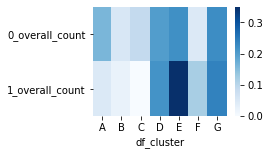

In [27]:
import seaborn as sns
#Perfilamiento
aux = df[[x for x in df.columns 
          if x.endswith('count')] + ['df_cluster']].groupby('df_cluster').mean()
#Porcentaje respecto a la suma por columna
for col in aux.columns:
    aux[col] = aux[col]/aux[col].sum()

fig = plt.figure()
fig, ax = plt.subplots(figsize=(3,2)) 
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

#Heatmap
sns.heatmap(aux.transpose(), cmap = 'Blues')

## Conservación del modelo

In [ ]:
import pickle
with open('AZ_modelo_nosup_product.pkl', "wb") as f:
    pickle.dump(cluster, f)

In [28]:
import pickle    
with open('AZ_modelo_nosup_product.pkl', "rb") as f:
    cluster = pickle.load(f)
    
cluster

GaussianMixture(n_components=7, random_state=22)

In [36]:
export = backup.merge(df['df_cluster'].reset_index(), on = 'asin', how = 'left')
export.to_csv(liga + 'df_cluster.csv', index = False)

## Fin

In [21]:
#Tiempo total para correr el notebook
end = time.time()
time_exp(end - start)
tono()

6 minutos con 55.26 segundos
